## Risk assessment and water conservation Model

### 1. Uploading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
filepath= "/Users/Deeroo/Downloads/SayaData/ACAMA_Monthly.csv"
ACMA_DF= pd.read_csv(filepath)
ACMA_DF['Meter']= ACMA_DF.Meter.astype(str)
ACMA_DF['Consumption']= ACMA_DF.Consumption.astype(int)
ACMA_DF['Date']= pd.to_datetime(ACMA_DF['Date'])
ACMA_DF.head()

,Date,Consumption,Meter
0,2022-01-22,2290,19240202
1,2022-02-22,4988,19240202
2,2022-03-22,4648,19240202
3,2022-04-22,5145,19240202
4,2022-05-22,5887,19240202


### 2. Feature engineering

In [2]:
#Mapping the occupants with the meters 
Occupants_num = {'19240202': 2, '19240208': 4 , 
                '19240210': 4, '19240215': 2 , 
                '19240216': 2, '19240218': 2 ,
                '19240219': 3, '19240220': 4 ,
                '19240221': 2 }
#Adding the needed features 
ACMA_DF["No_Occupants"]= ACMA_DF.Meter.map(Occupants_num)
ACMA_DF['Avg_person']= ACMA_DF['Consumption']/ ACMA_DF['No_Occupants']
ACMA_DF['Avg_person'] = ACMA_DF['Avg_person'].astype(int)
ACMA_DF["Month"]=ACMA_DF.Date.dt.month
ACMA_DF.head()

,Date,Consumption,Meter,No_Occupants,Avg_person,Month
0,2022-01-22,2290,19240202,2,1145,1
1,2022-02-22,4988,19240202,2,2494,2
2,2022-03-22,4648,19240202,2,2324,3
3,2022-04-22,5145,19240202,2,2572,4
4,2022-05-22,5887,19240202,2,2943,5


### 3. Data visualization

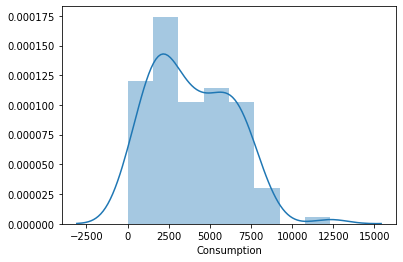

In [3]:
# visualizing the data distribution
sns.distplot(ACMA_DF.Consumption)

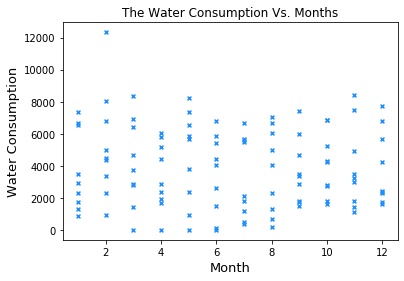

In [6]:
#Plotting the data(consumption Vs. Months )
plt.scatter(ACMA_DF["Month"], ACMA_DF["Consumption"],
                marker="x", color='#1E90FF', s=15 ,alpha=1)  
plt.xlabel('Month', fontsize=13)
plt.ylabel('Water Consumption', fontsize=13)
plt.title("The Water Consumption Vs. Months")
plt.show()


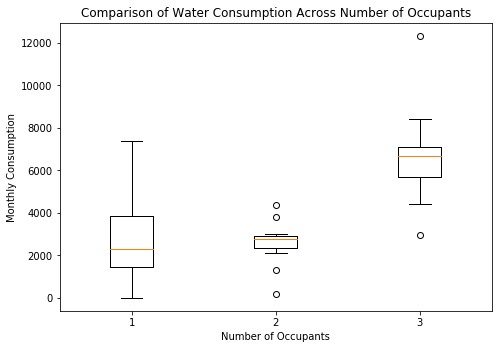

In [7]:
# Creating dataset for the boxplot

data_2 = ACMA_DF[ACMA_DF.No_Occupants==2]
data_2 = np.array(data_2.Consumption)
data_3 = ACMA_DF[ACMA_DF.No_Occupants==3]
data_3 = np.array(data_3.Consumption)
data_4 = ACMA_DF[ACMA_DF.No_Occupants==4]
data_4 = np.array(data_4.Consumption)
data = [data_2, data_3, data_4]
fig = plt.figure(figsize =(6, 4))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(data)
ax.set(title='Comparison of Water Consumption Across Number of Occupants',
    xlabel='Number of Occupants',
    ylabel='Monthly Consumption')
# show plot
plt.show()

### 4. Data Modeling 

In [8]:
#Preparing the data 
ACMA_Array= np.array(ACMA_DF)
ACMA_Array= np.delete(ACMA_Array, [0,2,3,5,6,7],1)
ACMA_Array[0:5]

/Users/Deeroo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[2290, 1145],
       [4988, 2494],
       [4648, 2324],
       [5145, 2572],
       [5887, 2943]], dtype=object)

In [9]:
# Model initiation 
Model = KMeans(n_clusters= 3)
Model.fit(ACMA_Array)
centroids= Model.cluster_centers_
labels= Model.labels_
centroids


array([[1654.48979592,  733.97959184],
       [4658.94117647, 1737.82352941],
       [7289.16      , 2080.28      ]])

In [10]:
#Adding the label to the dataframe
ACMA_DF["label"]= labels

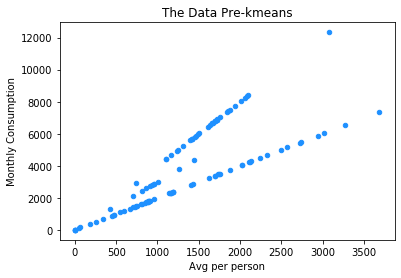

In [23]:
#Visualizing the data post the k-Means 

plt.scatter(ACMA_DF["Avg_person"], ACMA_DF["Consumption"], color='#1E90FF', s=20 ,alpha=1)  
plt.xlabel('Avg per person', fontsize=10)
plt.ylabel('Monthly Consumption', fontsize=10)
plt.title("The Data Pre-kmeans")
plt.show()


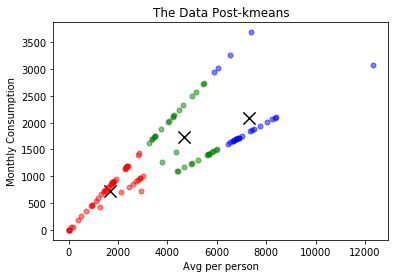

In [22]:
#Visualizing the data after the k-Means 
# Set up our color palette 
colors = ["r.","g.","b.","c.","m."]
# Plot each point
for i in range(len(ACMA_Array)):
    plt.plot(ACMA_Array[i][0], ACMA_Array[i][1], colors[labels[i]],alpha= 0.5, markersize = 10)
# Generate the view
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", color='#030303',s=150, linewidths = 5)
plt.xlabel('Avg per person', fontsize=10)
plt.ylabel('Monthly Consumption', fontsize=10)
plt.title("The Data Post-kmeans")
plt.show()

In [13]:
x= ACMA_DF.groupby(["label"])[['Consumption']].count()
x2= ACMA_DF.groupby(["label"])[['Consumption']].mean()
print(x, x2)


       Consumption
label             
0               49
1               34
2               25        Consumption
label             
0      1654.489796
1      4658.941176
2      7289.160000


In [15]:
#Adding the Consumption Category (Risky, Moderate or conservative)

ACMA_DF["Category"]=["Risky" if (x == 2) else "Moderate" if (x == 1) else "Conservative" 
                for x in ACMA_DF['label']  ]

ACMA_DF

,Date,Consumption,Meter,No_Occupants,Avg_person,Month,label,Category
0,2022-01-22,2290,19240202,2,1145,1,0,Conservative
1,2022-02-22,4988,19240202,2,2494,2,1,Moderate
2,2022-03-22,4648,19240202,2,2324,3,1,Moderate
3,2022-04-22,5145,19240202,2,2572,4,1,Moderate
4,2022-05-22,5887,19240202,2,2943,5,2,Risky
...,...,...,...,...,...,...,...,...
103,2022-12-24,1597,19240218,2,798,12,0,Conservative
104,2022-12-24,1771,19240215,2,885,12,0,Conservative
105,2022-12-24,5656,19240210,4,1414,12,1,Moderate
106,2022-12-24,2429,19240219,3,809,12,0,Conservative


### 5. Report Outputs

In [24]:
#Property Monthly consmption
ACMA_DF.groupby(["Month"])[["Consumption"]].sum()

,Consumption
Month,
1,33200
2,47591
3,37213
4,30238
5,40808
6,30753
7,29418
8,33308
9,32852


In [26]:
#The meters yearly consumption 
ACMA_Monthly_cons20222= ACMA_DF.groupby(["Meter"])[["Consumption"]].sum()
#ACMA_Monthly_cons20222.to_excel("ACMA_Monthly_cons2022.xlsx")
ACMA_Monthly_cons20222

,Consumption
Meter,
19240202,55075
19240208,79972
19240210,68603
19240215,19769
19240216,26597
19240218,10788
19240219,31063
19240220,85764
19240221,44072


In [27]:
#The overall consumption Behavior & associated Risks 
Behaveor= ACMA_DF.groupby(["Meter", "Category" ])[['Category']].count()
Behaveor


Category
Meter    Category              
19240202 Conservative         1
         Moderate             9
         Risky                2
19240208 Moderate             3
         Risky                9
19240210 Moderate             9
         Risky                3
19240215 Conservative        12
19240216 Conservative         8
         Moderate             4
19240218 Conservative        12
19240219 Conservative        10
         Moderate             2
19240220 Conservative         1
         Moderate             2
         Risky                9
19240221 Conservative         5
         Moderate             5
         Risky                2

### 6. Setting the Consumption Cap 

In [63]:
#The averge of each catgory will be the Monthly cap
Risky= ACMA_DF[ACMA_DF.label==2]
Moderate= ACMA_DF[ACMA_DF.label==1]
Conservative= ACMA_DF[ACMA_DF.label==0]
print ("The Monthly Consumption Cap:\nRisky Category: " + str(Risky.Consumption.mean())
      + "\nModerate Category: " + str(Moderate.Consumption.mean()) 
      + "\nConservative Category: " + str(Conservative.Consumption.mean()) 
      )


The Monthly Consumption Cap:
Risky Category: 7289.16
Moderate Category: 4658.941176470588
Conservative Category: 1654.4897959183672
